#### Credits

- 2021 Python for Machine Learning & Data Science Masterclass by Jose Portilla [Udemy](https://www.udemy.com/course/python-for-machine-learning-data-science-masterclass/)

In [1]:
# adjusting notebook layout
from IPython.core.display import display, HTML
display(HTML('<style>'
        '#notebook { padding-top:0px !important; } ' 
        '.container { width:100% !important; } '
        '.end_space { min-height:0px !important; } '
    '</style>'
))

<a id='back_to_top'></a>

[Pandas](https://pandas.pydata.org/docs/) is an opensource library for data analysis for Python. It uses extremely powerful table object (DataFrame) system built off of NumPy.
- Tools for reading and writing data between many formats. Like directly read and write data from a SQL database, or from a website.
- Intelligently grab data based on indexing, logic, subsetting, and more.
- Handle missing data.
- Adjust and restructure data. 

It is not just Excel for Python but much more that. We will look into - 
* [Series](#Series)
* [DataFrame](#DataFrame)
* [Conditional Filtering](#Conditional_Filtering)
* [Useful Methods](#Useful_Methods)
* [Missing Data](#Missing_Data)
* [Group By Operations](#Group_By_Operations)
* [Combining DataFrames](#Combining_DataFrames)
* [Text Methods and Time Methods](#Text_Methods_and_Time_Methods)
* [Inputs and Outputs](#Inputs_and_Outputs)

In [2]:
import numpy as np
import pandas as pd
# help(pd.Series)

<a id='Series'></a>

# Series
A Series is very similar to a NumPy array (in fact it is built on top of the NumPy array object). What differentiates the NumPy array from a Series, is that a Series can have axis labels, meaning it can be indexed by a label, instead of just a number location. It also doesn't need to hold numeric data, it can hold any arbitrary Python Object.

### pd.Series()

In [3]:
myIdx  = ['USA', 'Canada', 'Mexico']
myData = [1776, 1867, 1821]

# creating a pandas series using list and 
# default numeric index like NumPy
mySer = pd.Series(data=myData)
print(mySer, '\n')

# also set labelled index (unlike NumPy) like a dict
mySer = pd.Series(data=myData, index=myIdx)
print(mySer, '\n')

print(mySer[0], mySer['USA'], '\n')

# creatre a series from a dict
ages = {'Sam':5, 'Frank':10, 'Spike':7}
print(pd.Series(ages))

0    1776
1    1867
2    1821
dtype: int64 

USA       1776
Canada    1867
Mexico    1821
dtype: int64 

1776 1776 

Sam       5
Frank    10
Spike     7
dtype: int64


### add()

In [4]:
#EXAMPLE
# Imaginary Sales Data for 1st and 
# 2nd Quarters of Global Company
q1 = {'Japan':80, 'China':450, 'India':200, 'USA':250}
q2 = {'Brazil':100,'China':500, 'India':210,'USA':260}

sales_q1 = pd.Series(q1)
sales_q2 = pd.Series(q2)

# since the Pandas series as based off of NumPy array
# we can have them broadcasted
print(sales_q1 * 2, '\n')

# Pandas can match thins up b/w two series 
# Notice how Pandas informs you of mismatch with NaN
print(sales_q1 + sales_q2, '\n')

# You can fill these with any value you want
print(sales_q1.add(sales_q2, fill_value=0), '\n')

print("Notice that the labels are now odered and \
numeric values are all floats!")

Japan    160
China    900
India    400
USA      500
dtype: int64 

Brazil      NaN
China     950.0
India     410.0
Japan       NaN
USA       510.0
dtype: float64 

Brazil    100.0
China     950.0
India     410.0
Japan      80.0
USA       510.0
dtype: float64 

Notice that the labels are now odered and numeric values are all floats!


[Back to top](#back_to_top)

<a id='DataFrame'></a>

# DataFrame
A DataFrame is a table of columns and rows in pandas that we can easily restructure and filter. DataFrames are an extremely powerful tool and a natural extension of the Pandas Series. By definition all a DataFrame is: a Pandas DataFrame consists of multiple Pandas Series that share index values.

### pd.DataFrame()

In [5]:
# creating a DataFrame from a np multi-D array
np.random.seed(101)
myData = np.random.randint(0,101,(4,3))
myIdx  = ['CA','NY','AZ','TX']
myCols = ['Jan', 'Feb', 'Mar']

# automatic numeric index
myDF = pd.DataFrame(data=myData)
print(myDF, '\n')

# provide labelled indices
myDF = pd.DataFrame(data=myData, index=myIdx)
print(myDF, '\n')

# provide labelled columns
myDF = pd.DataFrame(data=myData, index=myIdx, \
                    columns=myCols)
print(myDF, '\n')

# get general info about the DataFrame
myDF.info()

    0   1   2
0  95  11  81
1  70  63  87
2  75   9  77
3  40   4  63 

     0   1   2
CA  95  11  81
NY  70  63  87
AZ  75   9  77
TX  40   4  63 

    Jan  Feb  Mar
CA   95   11   81
NY   70   63   87
AZ   75    9   77
TX   40    4   63 

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, CA to TX
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Jan     4 non-null      int64
 1   Feb     4 non-null      int64
 2   Mar     4 non-null      int64
dtypes: int64(3)
memory usage: 128.0+ bytes


### info(), columns, index, head(), tail()

In [6]:
# creating a DataFrame from a CSV file
myDF = pd.read_csv('data/tips.csv')
print(myDF.info(), '\n')   # know the data
print(myDF.columns, '\n')  # column labels/names
print(myDF.index,   '\n')  # index labels/names
print(myDF.head(3), '\n')  # shows first n rows
print(myDF.tail(5), '\n')  # shows last n rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        244 non-null    float64
 1   tip               244 non-null    float64
 2   sex               244 non-null    object 
 3   smoker            244 non-null    object 
 4   day               244 non-null    object 
 5   time              244 non-null    object 
 6   size              244 non-null    int64  
 7   price_per_person  244 non-null    float64
 8   Payer Name        244 non-null    object 
 9   CC Number         244 non-null    int64  
 10  Payment ID        244 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 21.1+ KB
None 

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size',
       'price_per_person', 'Payer Name', 'CC Number', 'Payment ID'],
      dtype='object') 

RangeIndex(start=0, stop=244, step=1) 

   total_bill

### round()

In [7]:
# rounding off using NumPy and Pandas DataFrame
#np.round(myDF, decimals=2) 
# OR directly use Pandas
myDF.round(decimals=2)[0:3]

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458


### describe().transpose()

In [8]:
# calculate simple stats for numeric columns
print("Note that some of these values don't make any \
sense like stats of CC Number!\n\n")
print(myDF.describe().transpose(),'\n') 

Note that some of these values don't make any sense like stats of CC Number!


                  count          mean           std           min  \
total_bill        244.0  1.978594e+01  8.902412e+00  3.070000e+00   
tip               244.0  2.998279e+00  1.383638e+00  1.000000e+00   
size              244.0  2.569672e+00  9.510998e-01  1.000000e+00   
price_per_person  244.0  7.888197e+00  2.914234e+00  2.880000e+00   
CC Number         244.0  2.563496e+15  2.369340e+15  6.040679e+10   

                           25%           50%           75%           max  
total_bill        1.334750e+01  1.779500e+01  2.412750e+01  5.081000e+01  
tip               2.000000e+00  2.900000e+00  3.562500e+00  1.000000e+01  
size              2.000000e+00  2.000000e+00  3.000000e+00  6.000000e+00  
price_per_person  5.800000e+00  7.255000e+00  9.390000e+00  2.027000e+01  
CC Number         3.040731e+13  3.525318e+15  4.553675e+15  6.596454e+15   



### Working with DataFrame columns

In [9]:
# access columns via a list of labels
myDF[['total_bill','tip']][:5]

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


In [10]:
# operations on columns
100 *myDF['tip']/(myDF['tip']+myDF['total_bill'])

0       5.611111
1      13.833333
2      14.279886
3      12.263801
4      12.801418
         ...    
239    16.938484
240     6.854010
241     8.107013
242     8.942259
243    13.774105
Length: 244, dtype: float64

In [11]:
# override existing column
myDF['price_per_person'] = myDF['price_per_person'] + 1
myDF['price_per_person']

0       9.49
1       4.45
2       8.00
3      12.84
4       7.15
       ...  
239    10.68
240    14.59
241    12.34
242     9.91
243    10.39
Name: price_per_person, Length: 244, dtype: float64

### df['newCol'] = ...

In [12]:
# insert a new column in DataFrame
myDF['tip_percentage'] = 100 *myDF['tip']/(myDF['tip']+myDF['total_bill'])
# round off again for new cols
myDF.round(decimals=2).head(5) 

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,9.49,Christy Cunningham,3560325168603410,Sun2959,5.61
1,10.34,1.66,Male,No,Sun,Dinner,3,4.45,Douglas Tucker,4478071379779230,Sun4608,13.83
2,21.01,3.50,Male,No,Sun,Dinner,3,8.00,Travis Walters,6011812112971322,Sun4458,14.28
3,23.68,3.31,Male,No,Sun,Dinner,2,12.84,Nathaniel Harris,4676137647685994,Sun5260,12.26
4,24.59,3.61,Female,No,Sun,Dinner,4,7.15,Tonya Carter,4832732618637221,Sun2251,12.80


### drop()

In [13]:
# remove a column (always use the axis!)
#myDF.drop(labels='CC Number', axis=1)
#print(myDF.info()) # still has 12 cols
# inplace makes the changes permanent (NOT RECOMMENDED)
#myDF.drop(labels='CC Number', axis=1, inplace=True)
# RECOMMENDED
myDF = myDF.drop(labels='CC Number', axis=1)

# round off permanently
myDF = myDF.round(decimals=2) 
myDF.head(5)

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,Payment ID,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,9.49,Christy Cunningham,Sun2959,5.61
1,10.34,1.66,Male,No,Sun,Dinner,3,4.45,Douglas Tucker,Sun4608,13.83
2,21.01,3.50,Male,No,Sun,Dinner,3,8.00,Travis Walters,Sun4458,14.28
3,23.68,3.31,Male,No,Sun,Dinner,2,12.84,Nathaniel Harris,Sun5260,12.26
4,24.59,3.61,Female,No,Sun,Dinner,4,7.15,Tonya Carter,Sun2251,12.80


### Working with DataFrame rows

### set_index()

In [14]:
# setting up a column with unique entries 
# just like labels for the rows
myDF = myDF.set_index('Payment ID')
print("Payment ID is now the name of the index!", '\n\n')
myDF.head(5)

Payment ID is now the name of the index! 




,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,tip_percentage
Payment ID,,,,,,,,,,
Sun2959,16.99,1.01,Female,No,Sun,Dinner,2,9.49,Christy Cunningham,5.61
Sun4608,10.34,1.66,Male,No,Sun,Dinner,3,4.45,Douglas Tucker,13.83
Sun4458,21.01,3.50,Male,No,Sun,Dinner,3,8.00,Travis Walters,14.28
Sun5260,23.68,3.31,Male,No,Sun,Dinner,2,12.84,Nathaniel Harris,12.26
Sun2251,24.59,3.61,Female,No,Sun,Dinner,4,7.15,Tonya Carter,12.80


### reset_index()

In [15]:
# reset the index ()
myDF = myDF.reset_index()
print("Payment ID column goes to 1st place!", '\n\n')
myDF.head(5)

Payment ID column goes to 1st place! 




,Payment ID,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,tip_percentage
0,Sun2959,16.99,1.01,Female,No,Sun,Dinner,2,9.49,Christy Cunningham,5.61
1,Sun4608,10.34,1.66,Male,No,Sun,Dinner,3,4.45,Douglas Tucker,13.83
2,Sun4458,21.01,3.50,Male,No,Sun,Dinner,3,8.00,Travis Walters,14.28
3,Sun5260,23.68,3.31,Male,No,Sun,Dinner,2,12.84,Nathaniel Harris,12.26
4,Sun2251,24.59,3.61,Female,No,Sun,Dinner,4,7.15,Tonya Carter,12.80


### iloc[], loc[]

In [18]:
myDF = myDF.set_index('Payment ID')

# grab a row(s) with integer-location (iloc)
#myDF.iloc[0:4] # OR myDF[0:4] OR

# grab a row with (labelled) location (loc)
myDF.loc[['Sun2959','Sun4608','Sun4458','Sun5260']]

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,tip_percentage
Payment ID,,,,,,,,,,
Sun2959,16.99,1.01,Female,No,Sun,Dinner,2,9.49,Christy Cunningham,5.61
Sun4608,10.34,1.66,Male,No,Sun,Dinner,3,4.45,Douglas Tucker,13.83
Sun4458,21.01,3.50,Male,No,Sun,Dinner,3,8.00,Travis Walters,14.28
Sun5260,23.68,3.31,Male,No,Sun,Dinner,2,12.84,Nathaniel Harris,12.26


### drop()

In [19]:
# remove a row (note the axis is 0 by default)
myDF = myDF.drop('Sun2959')
myDF.head(5)

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,tip_percentage
Payment ID,,,,,,,,,,
Sun4608,10.34,1.66,Male,No,Sun,Dinner,3,4.45,Douglas Tucker,13.83
Sun4458,21.01,3.50,Male,No,Sun,Dinner,3,8.00,Travis Walters,14.28
Sun5260,23.68,3.31,Male,No,Sun,Dinner,2,12.84,Nathaniel Harris,12.26
Sun2251,24.59,3.61,Female,No,Sun,Dinner,4,7.15,Tonya Carter,12.80
Sun9679,25.29,4.71,Male,No,Sun,Dinner,4,7.32,Erik Smith,15.70


### slicing

In [20]:
# remove row(s) by slicing
myDF = myDF.iloc[2:]
myDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 241 entries, Sun5260 to Thur672
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        241 non-null    float64
 1   tip               241 non-null    float64
 2   sex               241 non-null    object 
 3   smoker            241 non-null    object 
 4   day               241 non-null    object 
 5   time              241 non-null    object 
 6   size              241 non-null    int64  
 7   price_per_person  241 non-null    float64
 8   Payer Name        241 non-null    object 
 9   tip_percentage    241 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 20.7+ KB


### append()

In [21]:
# inserting a new row
one_row = myDF.iloc[0]
myDF = myDF.append(one_row)
myDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242 entries, Sun5260 to Sun5260
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        242 non-null    float64
 1   tip               242 non-null    float64
 2   sex               242 non-null    object 
 3   smoker            242 non-null    object 
 4   day               242 non-null    object 
 5   time              242 non-null    object 
 6   size              242 non-null    int64  
 7   price_per_person  242 non-null    float64
 8   Payer Name        242 non-null    object 
 9   tip_percentage    242 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 20.8+ KB


[Back to top](#back_to_top)

<a id='Conditional_Filtering'></a>

# Conditional Filtering
The datasets are large enough that we don't filter based on position, but instead based on a *condition*. Conditional Flitering allows us to select **rows** based on a condition on a column.

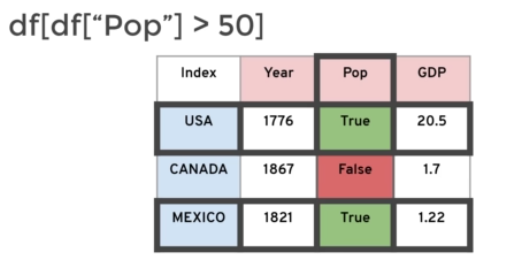

### read_csv()

In [22]:
# read the data
df = pd.read_csv('data/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251


### boolean list

In [23]:
# filter by total_bill > 40
df[df['total_bill'] > 40]

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
59,48.27,6.73,Male,No,Sat,Dinner,4,12.07,Brian Ortiz,6596453823950595,Sat8139
95,40.17,4.73,Male,Yes,Fri,Dinner,4,10.04,Aaron Bentley,180026611638690,Fri9628
102,44.30,2.50,Female,Yes,Sat,Dinner,3,14.77,Heather Cohen,379771118886604,Sat6240
142,41.19,5.00,Male,No,Thur,Lunch,5,8.24,Eric Andrews,4356531761046453,Thur3621
156,48.17,5.00,Male,No,Sun,Dinner,6,8.03,Ryan Gonzales,3523151482063321,Sun7518
170,50.81,10.00,Male,Yes,Sat,Dinner,3,16.94,Gregory Clark,5473850968388236,Sat1954
182,45.35,3.50,Male,Yes,Sun,Dinner,3,15.12,Jose Parsons,4112207559459910,Sun2337
184,40.55,3.00,Male,Yes,Sun,Dinner,2,20.27,Stephen Cox,3547798222044029,Sun5140
197,43.11,5.00,Female,Yes,Thur,Lunch,4,10.78,Brooke Soto,5544902205760175,Thur9313
212,48.33,9.00,Male,No,Sat,Dinner,4,12.08,Alex Williamson,676218815212,Sat4590


### & or | oprators

In [24]:
# filter by total_bill > 40 and (sex is Male or time is Dinner
# NOTE : 'and' / 'or' operators in python '&' / '|' in Pandas
df[(df['total_bill'] > 40) & ( (df['sex'] == 'Male') | (df['time'] == 'Dinner') )]

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
59,48.27,6.73,Male,No,Sat,Dinner,4,12.07,Brian Ortiz,6596453823950595,Sat8139
95,40.17,4.73,Male,Yes,Fri,Dinner,4,10.04,Aaron Bentley,180026611638690,Fri9628
102,44.30,2.50,Female,Yes,Sat,Dinner,3,14.77,Heather Cohen,379771118886604,Sat6240
142,41.19,5.00,Male,No,Thur,Lunch,5,8.24,Eric Andrews,4356531761046453,Thur3621
156,48.17,5.00,Male,No,Sun,Dinner,6,8.03,Ryan Gonzales,3523151482063321,Sun7518
170,50.81,10.00,Male,Yes,Sat,Dinner,3,16.94,Gregory Clark,5473850968388236,Sat1954
182,45.35,3.50,Male,Yes,Sun,Dinner,3,15.12,Jose Parsons,4112207559459910,Sun2337
184,40.55,3.00,Male,Yes,Sun,Dinner,2,20.27,Stephen Cox,3547798222044029,Sun5140
212,48.33,9.00,Male,No,Sat,Dinner,4,12.08,Alex Williamson,676218815212,Sat4590


### isin()

In [25]:
# filter by specific days
df[(df['day'] == 'Sun') | (df['day'] == 'Sat') | (df['day'] == 'Fri')]
# smarter way -> .isin(options) menthod
days = ['Fri', 'Sat','Sun']
df[df['day'].isin(days)]

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251
...,...,...,...,...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3,11.94,Kimberly Crane,676184013727,Sat9777
239,29.03,5.92,Male,No,Sat,Dinner,3,9.68,Michael Avila,5296068606052842,Sat2657
240,27.18,2.00,Female,Yes,Sat,Dinner,2,13.59,Monica Sanders,3506806155565404,Sat1766
241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.34,Keith Wong,6011891618747196,Sat3880


[Back to top](#back_to_top)

<a id='Useful_Methods'></a>

# Useful Methods

In [26]:
# read the data
df = pd.read_csv('data/tips.csv')

### apply()

In [27]:
# apply() method - apply and broadcast custom 
# functions on a DataFrame column

# function definition -- last four CC Numbers
lastFourNumbers = lambda num: str(num)[-4:]
# passing the function w/o args in apply()
df['last_four'] = df['CC Number'].apply(lastFourNumbers)

# function definition -- how pricy is it?
def yelp(price):
    if price < 10:
        return '$'
    elif price >= 10 and price < 30:
        return '$$'
    else:
        return '$$$'
# passing the function w/o args in apply()
df['yelp'] = df['total_bill'].apply(yelp)

df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,yelp
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410,$$
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,9230,$$
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,1322,$$
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260,5994,$$
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251,7221,$$


Check this stackoverflaw [link](https://stackoverflow.com/questions/19914937/applying-function-with-multiple-arguments-to-create-a-new-pandas-column) before moving on! 

In [28]:
# apply() method - apply and broadcast custom 
# functions on multiple DataFrame columns

# define a function -- tip quality?
def quality(total_bill, tip):
    if tip/total_bill > 0.25:
        return "Generous"
    else:
        return "Other"
# passing the function w/o args in apply()
df['Quality'] = df[['total_bill', 'tip']].apply( lambda df: quality(df['total_bill'], df['tip']), axis=1 )
df.head()
df.drop(labels='Quality', axis=1)
# a faster way it to VECTORIZE using numpy
df['Quality'] = np.vectorize(quality)(df['total_bill'], df['tip'])
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,yelp,Quality
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410,$$,Other
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,9230,$$,Other
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,1322,$$,Other
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260,5994,$$,Other
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251,7221,$$,Other


### time the vectorized function

In [29]:
import timeit 
  
# code snippet to be executed only once 
setup = '''
import numpy as np
import pandas as pd

df = pd.read_csv('data/tips.csv')

def quality(total_bill,tip):
    if tip/total_bill  > 0.25:
        return "Generous"
    else:
        return "Other"
'''
  
# code snippet whose execution time is to be measured 
stmt_one = ''' 
df['Tip Quality'] = df[['total_bill','tip']].apply(lambda df: quality(df['total_bill'],df['tip']),axis=1)
'''

stmt_two = '''
df['Tip Quality'] = np.vectorize(quality)(df['total_bill'], df['tip'])
'''

print(timeit.timeit(setup=setup, stmt=stmt_one, number=1000))
print(timeit.timeit(setup=setup, stmt=stmt_two, number=1000))

3.460557707992848
0.34476437902776524


The *quality()* funciton is NOT numpy-aware, so vectorizing it makes it numpy-aware and indeed faster!

In [30]:
# read the data
df = pd.read_csv('data/tips.csv')

### describe()

In [31]:
# check some statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,1.978594e+01,8.902412e+00,3.070000e+00,1.334750e+01,1.779500e+01,2.412750e+01,5.081000e+01
tip,244.0,2.998279e+00,1.383638e+00,1.000000e+00,2.000000e+00,2.900000e+00,3.562500e+00,1.000000e+01
size,244.0,2.569672e+00,9.510998e-01,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
price_per_person,244.0,7.888197e+00,2.914234e+00,2.880000e+00,5.800000e+00,7.255000e+00,9.390000e+00,2.027000e+01
CC Number,244.0,2.563496e+15,2.369340e+15,6.040679e+10,3.040731e+13,3.525318e+15,4.553675e+15,6.596454e+15


### sort_values()

In [32]:
# sort by values (highest to lowest)
# it doesn't actaully reorder the DataFrame 
# indexing but it just sorts the DataFrame 
# by the particular column(s) used for sorting 
df.sort_values('tip', ascending=False).head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
170,50.81,10.00,Male,Yes,Sat,Dinner,3,16.94,Gregory Clark,5473850968388236,Sat1954
212,48.33,9.00,Male,No,Sat,Dinner,4,12.08,Alex Williamson,676218815212,Sat4590
23,39.42,7.58,Male,No,Sat,Dinner,4,9.86,Lance Peterson,3542584061609808,Sat239
59,48.27,6.73,Male,No,Sat,Dinner,4,12.07,Brian Ortiz,6596453823950595,Sat8139
141,34.30,6.70,Male,No,Thur,Lunch,6,5.72,Steven Carlson,3526515703718508,Thur1025


In [33]:
# sort by multiple values here the sorting 
# happens for the first label and then the
# next and so on ...
df.sort_values(['tip', 'size'])

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
67,3.07,1.00,Female,Yes,Sat,Dinner,1,3.07,Tiffany Brock,4359488526995267,Sat3455
111,7.25,1.00,Female,No,Sat,Dinner,1,7.25,Terri Jones,3559221007826887,Sat4801
92,5.75,1.00,Female,Yes,Fri,Dinner,2,2.88,Leah Ramirez,3508911676966392,Fri3780
236,12.60,1.00,Male,Yes,Sat,Dinner,2,6.30,Matthew Myers,3543676378973965,Sat5032
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
...,...,...,...,...,...,...,...,...,...,...,...
141,34.30,6.70,Male,No,Thur,Lunch,6,5.72,Steven Carlson,3526515703718508,Thur1025
59,48.27,6.73,Male,No,Sat,Dinner,4,12.07,Brian Ortiz,6596453823950595,Sat8139
23,39.42,7.58,Male,No,Sat,Dinner,4,9.86,Lance Peterson,3542584061609808,Sat239
212,48.33,9.00,Male,No,Sat,Dinner,4,12.08,Alex Williamson,676218815212,Sat4590


### min(), max()

In [34]:
# grab values of min / max values
df['total_bill'].min(), df['total_bill'].max()

(3.07, 50.81)

In [35]:
# grab locations of min / max values
df['total_bill'].idxmin(), df['total_bill'].idxmax()

(67, 170)

In [36]:
df.iloc[[67, 170]]

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
67,3.07,1.0,Female,Yes,Sat,Dinner,1,3.07,Tiffany Brock,4359488526995267,Sat3455
170,50.81,10.0,Male,Yes,Sat,Dinner,3,16.94,Gregory Clark,5473850968388236,Sat1954


### corr()

In [37]:
# how correlated the column values are with
# each other (for numeric columns only)
# -1 => fully uncorrelated
#  1 => fully correlated
df.corr()

,total_bill,tip,size,price_per_person,CC Number
total_bill,1.000000,0.675734,0.598315,0.647554,0.104576
tip,0.675734,1.000000,0.489299,0.347405,0.110857
size,0.598315,0.489299,1.000000,-0.175359,-0.030239
price_per_person,0.647554,0.347405,-0.175359,1.000000,0.135240
CC Number,0.104576,0.110857,-0.030239,0.135240,1.000000


### value_counts()

In [38]:
# counts per possible entry in a catagorical column
df['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

### unique(), nunique()

In [39]:
# unique entries in the dataset
df['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [40]:
# number of unique entries in the dataset
df['day'].nunique() # OR len(df['day'].unique())

4

### replace()

In [41]:
# replace values from in column with another value
# useful for a couple of items to replace
df['sex'] = df['sex'].replace(['Female', 'Male'], ['F', 'M'])
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,F,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,M,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,M,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,M,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,F,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251


### map()

In [42]:
# mapping using a dict
# useful when multiple items to replace
myMap = {'Dinner':'D', 'Lunch':'L'}
df['time'] = df['time'].map(myMap)
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,F,No,Sun,D,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,M,No,Sun,D,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,M,No,Sun,D,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,M,No,Sun,D,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,F,No,Sun,D,4,6.15,Tonya Carter,4832732618637221,Sun2251


### duplicated(), drop_duplicates()

In [43]:
# duplication (testing purpose)
df = df.append(df.iloc[-1:])
df

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,F,No,Sun,D,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,M,No,Sun,D,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,M,No,Sun,D,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,M,No,Sun,D,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,F,No,Sun,D,4,6.15,Tonya Carter,4832732618637221,Sun2251
...,...,...,...,...,...,...,...,...,...,...,...
240,27.18,2.00,F,Yes,Sat,D,2,13.59,Monica Sanders,3506806155565404,Sat1766
241,22.67,2.00,M,Yes,Sat,D,2,11.34,Keith Wong,6011891618747196,Sat3880
242,17.82,1.75,M,No,Sat,D,2,8.91,Dennis Dixon,4375220550950,Sat17
243,18.78,3.00,F,No,Thur,D,2,9.39,Michelle Hardin,3511451626698139,Thur672


In [44]:
# return true for the very first 
# instance of a duplicate row
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
240    False
241    False
242    False
243    False
243     True
Length: 245, dtype: bool

In [45]:
# remove duplicate rows
df = df.drop_duplicates()
df

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,F,No,Sun,D,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,M,No,Sun,D,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,M,No,Sun,D,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,M,No,Sun,D,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,F,No,Sun,D,4,6.15,Tonya Carter,4832732618637221,Sun2251
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,M,No,Sat,D,3,9.68,Michael Avila,5296068606052842,Sat2657
240,27.18,2.00,F,Yes,Sat,D,2,13.59,Monica Sanders,3506806155565404,Sat1766
241,22.67,2.00,M,Yes,Sat,D,2,11.34,Keith Wong,6011891618747196,Sat3880
242,17.82,1.75,M,No,Sat,D,2,8.91,Dennis Dixon,4375220550950,Sat17


### between()

In [46]:
# which values in a column are b/w 
# two values you choose
filterBill = df['total_bill'].between(10,20,inclusive=True)

# use it as a filter itself
df = df[filterBill]
df

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,F,No,Sun,D,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,M,No,Sun,D,3,3.45,Douglas Tucker,4478071379779230,Sun4608
8,15.04,1.96,M,No,Sun,D,2,7.52,Joseph Mcdonald,3522866365840377,Sun6820
9,14.78,3.23,M,No,Sun,D,2,7.39,Jerome Abbott,3532124519049786,Sun3775
10,10.27,1.71,M,No,Sun,D,2,5.14,William Riley,566287581219,Sun2546
...,...,...,...,...,...,...,...,...,...,...,...
234,15.53,3.00,M,Yes,Sat,D,2,7.76,Tracy Douglas,4097938155941930,Sat7220
235,10.07,1.25,M,No,Sat,D,2,5.04,Sean Gonzalez,3534021246117605,Sat4615
236,12.60,1.00,M,Yes,Sat,D,2,6.30,Matthew Myers,3543676378973965,Sat5032
242,17.82,1.75,M,No,Sat,D,2,8.91,Dennis Dixon,4375220550950,Sat17


### nlargest(), nsmallest()

In [47]:
# grab n largest rows odered by columns in descending order
df.nlargest(10, 'tip')

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
93,16.32,4.30,F,Yes,Fri,D,2,8.16,Natalie Nguyen,5181236182893396,Fri6963
191,19.81,4.19,F,Yes,Thur,L,2,9.90,Kristy Boyd,4317015327600068,Thur967
20,17.92,4.08,M,No,Sat,D,2,8.96,Thomas Rice,4403296224639756,Sat1709
87,18.28,4.00,M,No,Thur,L,2,9.14,Donald Williams,5363745772301404,Thur3636
109,14.31,4.00,F,Yes,Sat,D,2,7.16,Amanda Anderson,375638820334211,Sat2614
174,16.82,4.00,M,Yes,Sun,D,2,8.41,Brian Miles,3586342145399277,Sun7621
194,16.58,4.00,M,Yes,Thur,L,2,8.29,Benjamin Weber,676210011505,Thur9318
200,18.71,4.00,M,Yes,Thur,L,3,6.24,Jason Conrad,4581233003487,Thur6048
63,18.29,3.76,M,Yes,Sat,D,4,4.57,Chad Hart,580171498976,Sat4178
108,18.24,3.76,M,No,Sat,D,2,9.12,Steven Grant,4112810433473856,Sat6376


In [48]:
# grab n smallest rows odered bycolumns in descending order
df.nsmallest(10, 'tip')

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
236,12.60,1.00,M,Yes,Sat,D,2,6.30,Matthew Myers,3543676378973965,Sat5032
0,16.99,1.01,F,No,Sun,D,2,8.49,Christy Cunningham,3560325168603410,Sun2959
215,12.90,1.10,F,Yes,Sat,D,2,6.45,Jessica Owen,4726904879471,Sat6983
75,10.51,1.25,M,No,Sat,D,2,5.26,Kenneth Hayes,213142079731108,Sat5056
235,10.07,1.25,M,No,Sat,D,2,5.04,Sean Gonzalez,3534021246117605,Sat4615
146,18.64,1.36,F,No,Thur,L,3,6.21,Kelly Estrada,60463302327,Thur3941
233,10.77,1.47,M,No,Sat,D,2,5.38,Paul Novak,6011698897610858,Sat1467
97,12.03,1.50,M,Yes,Fri,D,2,6.02,Eric Herrera,580116092652,Fri9268
99,12.46,1.50,M,No,Fri,D,2,6.23,Edward Carter,347435564751626,Fri5575
117,10.65,1.50,F,No,Thur,L,2,5.32,Linda Zhang,3560509622598239,Thur9593


### sampling()

In [49]:
# get random sample(s) from the DataFrame
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
147,11.87,1.63,F,No,Thur,L,2,5.94,Annette Cunningham,675937746864,Thur4780
122,14.26,2.50,M,No,Thur,L,2,7.13,Perry Garcia,180034646320219,Thur3579
140,17.47,3.50,F,No,Thur,L,2,8.74,Kayla Rios,5233918213804470,Thur3906
224,13.42,1.58,M,Yes,Fri,L,2,6.71,Ronald Vaughn DVM,341503466406403,Fri5959
41,17.46,2.54,M,No,Sun,D,2,8.73,David Boyer,3536678244278149,Sun9460


In [50]:
# get random sample(s) from the DataFrame 
# based on a fraction
df.sample(frac=0.1)

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
234,15.53,3.00,M,Yes,Sat,D,2,7.76,Tracy Douglas,4097938155941930,Sat7220
16,10.33,1.67,F,No,Sun,D,3,3.44,Elizabeth Foster,4240025044626033,Sun9715
151,13.13,2.00,M,No,Sun,D,2,6.56,Jason Arnold,3571825125296106,Sun2127
193,15.48,2.02,M,Yes,Thur,L,2,7.74,Raymond Sullivan,180068856139315,Thur606
109,14.31,4.00,F,Yes,Sat,D,2,7.16,Amanda Anderson,375638820334211,Sat2614
101,15.38,3.00,F,Yes,Fri,D,2,7.69,Tiffany Colon,6011012799432041,Fri8382
24,19.82,3.18,M,No,Sat,D,2,9.91,Christopher Ross,36739148167928,Sat6236
209,12.76,2.23,F,Yes,Sat,D,2,6.38,Sarah Cunningham,341876516331163,Sat1274
0,16.99,1.01,F,No,Sun,D,2,8.49,Christy Cunningham,3560325168603410,Sun2959
194,16.58,4.00,M,Yes,Thur,L,2,8.29,Benjamin Weber,676210011505,Thur9318


[Back to top](#back_to_top)

##### <a id='Missing_Data'></a>

# Missing Data
When reading in missing values, pandas will display them as **NaN** values.
There are also newer specialized null pandas values such as **pd.NaT** to imply the value missing should be a timestamp. Options for Missing Data -- Keep it, Remove it, Replace it.

Note, there is never 100% correct approach that applies to all circumstances, it all depends on the exact situation you encounter. 

**Keeping the missing data**

PROS:
- Easiest to do
- Does not manipulate or change the true data

CONS:
- Many methods do not support NaN
Often there are reasonable guesses

**Dropping or Removing the missing data**

*Dropping a Row*
- Makes sense when a lot of info is missing. Clearly this data point as a row should probably be dropped.
- Often a good idea to calculate a percentage of what data is dropped

*Dropping a Column*
- Good choice if every (most) row is missing that particular feature

PROS:
- Easy to do.
- Can be based on rules.

CONS:
- Potential to lose a lot of data or useful information.
- Limits trained models for future data.

**Filling in the missing data**

*Fill-in
- Fill with same value - Good choice if NaN was a placeholder (mostly for 0)
- Fill with interpolated or estimated value - Much harder and requires reasonable assumptions

PROS:
- Potential to save a lot of data for use in training a model

CONS:
- Hardest to do and somewhat arbitrary
- Potential to lead to false conclusions


### NANs

In [51]:
# NAN in numpy and pandas
np.nan, pd.NA, pd.NaT

(nan, <NA>, NaT)

In [52]:
# there is no way two missing values (nan)
# are always eqaul 
np.nan == np.nan

False

In [53]:
# check if its nan
myVar = np.nan
myVar is np.nan

True

### isnull(), notnull()

In [54]:
# load data (with missing values)
df = pd.read_csv('data/movie_scores.csv')
df.head()

,first_name,last_name,age,sex,pre_movie_score,post_movie_score
0,Tom,Hanks,63.0,m,8.0,10.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Hugh,Jackman,51.0,m,NaN,NaN
3,Oprah,Winfrey,66.0,f,6.0,8.0
4,Emma,Stone,31.0,f,7.0,9.0


In [55]:
# check for null/ non-null values
df.isnull(), df.notnull()

(   first_name  last_name    age    sex  pre_movie_score  post_movie_score
 0       False      False  False  False            False             False
 1        True       True   True   True             True              True
 2       False      False  False  False             True              True
 3       False      False  False  False            False             False
 4       False      False  False  False            False             False,
    first_name  last_name    age    sex  pre_movie_score  post_movie_score
 0        True       True   True   True             True              True
 1       False      False  False  False            False             False
 2        True       True   True   True            False             False
 3        True       True   True   True             True              True
 4        True       True   True   True             True              True)

In [56]:
# where the pre movie score is not null
df[df['pre_movie_score'].notnull()]

,first_name,last_name,age,sex,pre_movie_score,post_movie_score
0,Tom,Hanks,63.0,m,8.0,10.0
3,Oprah,Winfrey,66.0,f,6.0,8.0
4,Emma,Stone,31.0,f,7.0,9.0


In [57]:
# where is the pre movie score is null 
# and where I also know the first name
df[(df['pre_movie_score'].isnull()) & (df['first_name'].notnull())]

,first_name,last_name,age,sex,pre_movie_score,post_movie_score
2,Hugh,Jackman,51.0,m,NaN,NaN


In [58]:
# KEEP THE DATA
df

,first_name,last_name,age,sex,pre_movie_score,post_movie_score
0,Tom,Hanks,63.0,m,8.0,10.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Hugh,Jackman,51.0,m,NaN,NaN
3,Oprah,Winfrey,66.0,f,6.0,8.0
4,Emma,Stone,31.0,f,7.0,9.0


### dropna()

In [59]:
# DROP THE DATA

In [60]:
# drop all the columns with at least missing values
df.dropna(axis=1)

""
0
1
2
3
4


In [61]:
# drop all the rows with at least missing values
df.dropna()

,first_name,last_name,age,sex,pre_movie_score,post_movie_score
0,Tom,Hanks,63.0,m,8.0,10.0
3,Oprah,Winfrey,66.0,f,6.0,8.0
4,Emma,Stone,31.0,f,7.0,9.0


In [62]:
# drop only the row missing all the values
# thresh=1 mean do not drop the row with at
# least 1 not-null value
df.dropna(thresh=1)

,first_name,last_name,age,sex,pre_movie_score,post_movie_score
0,Tom,Hanks,63.0,m,8.0,10.0
2,Hugh,Jackman,51.0,m,NaN,NaN
3,Oprah,Winfrey,66.0,f,6.0,8.0
4,Emma,Stone,31.0,f,7.0,9.0


In [63]:
# drop rows based on a subset only
df.dropna(subset=['last_name', 'sex'])

,first_name,last_name,age,sex,pre_movie_score,post_movie_score
0,Tom,Hanks,63.0,m,8.0,10.0
2,Hugh,Jackman,51.0,m,NaN,NaN
3,Oprah,Winfrey,66.0,f,6.0,8.0
4,Emma,Stone,31.0,f,7.0,9.0


### fillna()

In [64]:
# FILL-IN THE DATA

In [65]:
# fill every missing value with the same value
df.fillna('!!!!!!') # DIRTY

,first_name,last_name,age,sex,pre_movie_score,post_movie_score
0,Tom,Hanks,63,m,8,10
1,!!!!!!,!!!!!!,!!!!!!,!!!!!!,!!!!!!,!!!!!!
2,Hugh,Jackman,51,m,!!!!!!,!!!!!!
3,Oprah,Winfrey,66,f,6,8
4,Emma,Stone,31,f,7,9


In [66]:
# fill every missing value with the same value
df.fillna(df.mean()) # DIRTY

,first_name,last_name,age,sex,pre_movie_score,post_movie_score
0,Tom,Hanks,63.00,m,8.0,10.0
1,NaN,NaN,52.75,NaN,7.0,9.0
2,Hugh,Jackman,51.00,m,7.0,9.0
3,Oprah,Winfrey,66.00,f,6.0,8.0
4,Emma,Stone,31.00,f,7.0,9.0


In [67]:
# fill while keeping the types same
df['pre_movie_score'] = df['pre_movie_score'].fillna(0)
df

,first_name,last_name,age,sex,pre_movie_score,post_movie_score
0,Tom,Hanks,63.0,m,8.0,10.0
1,NaN,NaN,NaN,NaN,0.0,NaN
2,Hugh,Jackman,51.0,m,0.0,NaN
3,Oprah,Winfrey,66.0,f,6.0,8.0
4,Emma,Stone,31.0,f,7.0,9.0


In [68]:
# fill in with a mean value
df = pd.read_csv('data/movie_scores.csv')
df['pre_movie_score'] = df['pre_movie_score'].fillna(df['pre_movie_score'].mean())
df

,first_name,last_name,age,sex,pre_movie_score,post_movie_score
0,Tom,Hanks,63.0,m,8.0,10.0
1,NaN,NaN,NaN,NaN,7.0,NaN
2,Hugh,Jackman,51.0,m,7.0,NaN
3,Oprah,Winfrey,66.0,f,6.0,8.0
4,Emma,Stone,31.0,f,7.0,9.0


In [69]:
# fill in with interpolated values
airline_tix = {'first':100,'business':np.nan,'economy-plus':50,'economy':30}
ser = pd.Series(airline_tix)
print(ser)
ser.interpolate()

first           100.0
business          NaN
economy-plus     50.0
economy          30.0
dtype: float64


first           100.0
business         75.0
economy-plus     50.0
economy          30.0
dtype: float64

[Back to top](#back_to_top)

##### <a id='Group_By_Operations'></a>

# Groupby Operations
A groupby() operation allows us to examine data on a per **category** basis. We need to choose a categorical column to call with groupby(). Categorical columns are non-continuous. Keep in mind, they can still be numerical, such as cabin class categories on a ship (e.g. Class 1, Class 2, Class 3). Note that in pandas calling groupby() by itself creates a “lazy” groupby object waiting to be evaluated by an aggregate method call.

In [70]:
df = pd.read_csv('data/mpg.csv')

In [71]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


### groupby()

In [72]:
# groupby using a single column
# how has miles per gallon changes per year?

# (LAZY) goupby object
df.groupby('model_year') 

Adding an aggregate method call. To use a grouped object, you need to tell pandas how you want to aggregate the data.

Common Options:

    mean(): Compute mean of groups
    sum(): Compute sum of group values
    size(): Compute group sizes
    count(): Compute count of group
    std(): Standard deviation of groups
    var(): Compute variance of groups
    sem(): Standard error of the mean of groups
    describe(): Generates descriptive statistics
    first(): Compute first of group values
    last(): Compute last of group values
    nth() : Take nth value, or a subset if n is a list
    min(): Compute min of group values
    max(): Compute max of group values
    
Full List at the Online Documentation: https://pandas.pydata.org/docs/reference/groupby.html

In [73]:
# (LAZY) goupby object
df.groupby('model_year') 

# use a method of the goupby object that
# returns a DataFrame with a named indices
# out which one can select a req column
# or even use methods like describe()
df.groupby('model_year').mean()

,mpg,cylinders,displacement,weight,acceleration,origin
model_year,,,,,,
70,17.689655,6.758621,281.413793,3372.793103,12.948276,1.310345
71,21.250000,5.571429,209.750000,2995.428571,15.142857,1.428571
72,18.714286,5.821429,218.375000,3237.714286,15.125000,1.535714
73,17.100000,6.375000,256.875000,3419.025000,14.312500,1.375000
74,22.703704,5.259259,171.740741,2877.925926,16.203704,1.666667
75,20.266667,5.600000,205.533333,3176.800000,16.050000,1.466667
76,21.573529,5.647059,197.794118,3078.735294,15.941176,1.470588
77,23.375000,5.464286,191.392857,2997.357143,15.435714,1.571429
78,24.061111,5.361111,177.805556,2861.805556,15.805556,1.611111


In [74]:
df.groupby('model_year').describe().transpose()

model_year                   70           71           72           73  \
mpg          count    29.000000    28.000000    28.000000    40.000000   
             mean     17.689655    21.250000    18.714286    17.100000   
             std       5.339231     6.591942     5.435529     4.700245   
             min       9.000000    12.000000    11.000000    11.000000   
             25%      14.000000    15.500000    13.750000    13.000000   
             50%      16.000000    19.000000    18.500000    16.000000   
             75%      22.000000    27.000000    23.000000    20.000000   
             max      27.000000    35.000000    28.000000    29.000000   
cylinders    count    29.000000    28.000000    28.000000    40.000000   
             mean      6.758621     5.571429     5.821429     6.375000   
             std       1.724926     1.665079     2.073708     1.807215   
             min       4.000000     4.000000     3.000000     3.000000   
             25%       6.000000     4.000000     4.000000     4.000000   
             50%       8.000000     6.000000     4.000000     7.000000   
             75%       8.000000     6.500000     8.000000     8.000000   
             max       8.000000     8.000000     8.000000     8.000000   
displacement count    29.000000    28.000000    28.000000    40.000000   
             mean    281.413793   209.750000   218.375000   256.875000   
             std     124.421380   115.102410   123.781964   121.722085   
             min      97.000000    71.000000    70.000000    68.000000   
             25%     198.000000    97.750000   109.250000   121.750000   
             50%     307.000000   228.500000   131.000000   276.000000   
             75%     383.000000   273.000000   326.000000   350.250000   
             max     455.000000   400.000000   429.000000   455.000000   
weight       count    29.000000    28.000000    28.000000    40.000000   
             mean   3372.793103  2995.428571  3237.714286  3419.025000   
             std     852.868663  1061.830859   974.520960   974.809133   
             min    1835.000000  1613.000000  2100.000000  1867.000000   
             25%    2648.000000  2110.750000  2285.500000  2554.500000   
             50%    3449.000000  2798.000000  2956.000000  3338.500000   
             75%    4312.000000  3603.250000  4169.750000  4247.250000   
             max    4732.000000  5140.000000  4633.000000  4997.000000   
acceleration count    29.000000    28.000000    28.000000    40.000000   
             mean     12.948276    15.142857    15.125000    14.312500   
             std       3.330982     2.666171     2.850032     2.754222   
             min       8.000000    11.500000    11.000000     9.500000   
             25%      10.000000    13.375000    13.375000    12.500000   
             50%      12.500000    14.500000    14.500000    14.000000   
             75%      15.000000    16.125000    16.625000    16.000000   
             max      20.500000    20.500000    23.500000    21.000000   
origin       count    29.000000    28.000000    28.000000    40.000000   
             mean      1.310345     1.428571     1.535714     1.375000   
             std       0.603765     0.741798     0.792658     0.667467   
             min       1.000000     1.000000     1.000000     1.000000   
             25%       1.000000     1.000000     1.000000     1.000000   
             50%       1.000000     1.000000     1.000000     1.000000   
             75%       1.000000     2.000000     2.000000     2.000000   
             max       3.000000     3.000000     3.000000     3.000000   

model_year                   74           75           76           77  \
mpg          count    27.000000    30.000000    34.000000    28.000000   
             mean     22.703704    20.266667    21.573529    23.375000   
             std       6.420010     4.940566     5.889297     6.675862   
             min      13.000000    13.000000    13.000000    15.000000   
   

In [75]:
# groupby multiple columns which uses
# multi-level hierarchy index

# (LAZY) goupby object
dfNew = df.groupby(['model_year', 'cylinders']).mean()
dfNew

mpg  displacement       weight  acceleration  \
model_year cylinders                                                       
70         4          25.285714    107.000000  2292.571429     16.000000   
           6          20.500000    199.000000  2710.500000     15.500000   
           8          14.111111    367.555556  3940.055556     11.194444   
71         4          27.461538    101.846154  2056.384615     16.961538   
           6          18.000000    243.375000  3171.875000     14.750000   
           8          13.428571    371.714286  4537.714286     12.214286   
72         3          19.000000     70.000000  2330.000000     13.500000   
           4          23.428571    111.535714  2382.642857     17.214286   
           8          13.615385    344.846154  4228.384615     13.000000   
73         3          18.000000     70.000000  2124.000000     13.500000   
           4          22.727273    109.272727  2338.090909     17.136364   
           6          19.000000    212.250000  2917.125000     15.687500   
           8          13.200000    365.250000  4279.050000     12.250000   
74         4          27.800000     96.533333  2151.466667     16.400000   
           6          17.857143    230.428571  3320.000000     16.857143   
           8          14.200000    315.200000  4438.400000     14.700000   
75         4          25.250000    114.833333  2489.250000     15.833333   
           6          17.583333    233.750000  3398.333333     17.708333   
           8          15.666667    330.500000  4108.833333     13.166667   
76         4          26.766667    106.333333  2306.600000     16.866667   
           6          20.000000    221.400000  3349.600000     17.000000   
           8          14.666667    324.000000  4064.666667     13.222222   
77         3          21.500000     80.000000  2720.000000     13.500000   
           4          29.107143    106.500000  2205.071429     16.064286   
           6          19.500000    220.400000  3383.000000     16.900000   
           8          16.000000    335.750000  4177.500000     13.662500   
78         4          29.576471    112.117647  2296.764706     16.282353   
           5          20.300000    131.000000  2830.000000     15.900000   
           6          19.066667    213.250000  3314.166667     16.391667   
           8          19.050000    300.833333  3563.333333     13.266667   
79         4          31.525000    113.583333  2357.583333     15.991667   
           5          25.400000    183.000000  3530.000000     20.100000   
           6          22.950000    205.666667  3025.833333     15.433333   
           8          18.630000    321.400000  3862.900000     15.400000   
80         3          23.700000     70.000000  2420.000000     12.500000   
           4          34.612000    111.000000  2360.080000     17.144000   
           5          36.400000    121.000000  2950.000000     19.900000   
           6          25.900000    196.500000  3145.500000     15.050000   
81         4          32.814286    108.857143  2275.476190     16.466667   
           6          23.428571    184.000000  3093.571429     15.442857   
           8          26.600000    350.000000  3725.000000     19.000000   
82         4          32.071429    118.571429  2402.321429     16.703571   
           6          28.333333    225.000000  2931.666667     16.033333   

                        origin  
model_year cylinders            
70         4          2.285714  
           6          1.000000  
           8          1.000000  
71         4          1.923077  
           6          1.000000  
           8          1.000000  
72         3          3.000000  
           4          1.928571  
           8          1.000000  
73         3          3.000000  
           4          2.000000  
           6          1.250000  
           8          1.000000  
74         4          2.200000  
           6          1.000000  
           8          1.000000  
75         4 

In [76]:
# multi-level hierarchy index
dfNew.index

MultiIndex([(70, 4),
            (70, 6),
            (70, 8),
            (71, 4),
            (71, 6),
            (71, 8),
            (72, 3),
            (72, 4),
            (72, 8),
            (73, 3),
            (73, 4),
            (73, 6),
            (73, 8),
            (74, 4),
            (74, 6),
            (74, 8),
            (75, 4),
            (75, 6),
            (75, 8),
            (76, 4),
            (76, 6),
            (76, 8),
            (77, 3),
            (77, 4),
            (77, 6),
            (77, 8),
            (78, 4),
            (78, 5),
            (78, 6),
            (78, 8),
            (79, 4),
            (79, 5),
            (79, 6),
            (79, 8),
            (80, 3),
            (80, 4),
            (80, 5),
            (80, 6),
            (81, 4),
            (81, 6),
            (81, 8),
            (82, 4),
            (82, 6)],
           names=['model_year', 'cylinders'])

In [77]:
# multi-level hierarchy indexed names
dfNew.index.names

FrozenList(['model_year', 'cylinders'])

In [78]:
# multi-level hierarchy indexed levels
dfNew.index.levels

FrozenList([[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], [3, 4, 5, 6, 8]])

In [79]:
# accesing multi-level indexed data
dfNew.loc[[70,82]]

mpg  displacement       weight  acceleration  \
model_year cylinders                                                       
70         4          25.285714    107.000000  2292.571429     16.000000   
           6          20.500000    199.000000  2710.500000     15.500000   
           8          14.111111    367.555556  3940.055556     11.194444   
82         4          32.071429    118.571429  2402.321429     16.703571   
           6          28.333333    225.000000  2931.666667     16.033333   

                        origin  
model_year cylinders            
70         4          2.285714  
           6          1.000000  
           8          1.000000  
82         4          1.714286  
           6          1.000000

In [80]:
# accesing multi-level indexed data using a tuple
dfNew.loc[(70,4)]

mpg               25.285714
displacement     107.000000
weight          2292.571429
acceleration      16.000000
origin             2.285714
Name: (70, 4), dtype: float64

### xs()

In [81]:
# accesing multi-level indexed using a 
# cross section

# we want all the instances year 70
dfNew.xs(key=70, level='model_year')

,mpg,displacement,weight,acceleration,origin
cylinders,,,,,
4,25.285714,107.000000,2292.571429,16.000000,2.285714
6,20.500000,199.000000,2710.500000,15.500000,1.000000
8,14.111111,367.555556,3940.055556,11.194444,1.000000


In [82]:
# we want all the instances of 4 cylinders
fourCyl = dfNew.xs(key=4, level='cylinders')
fourCyl

,mpg,displacement,weight,acceleration,origin
model_year,,,,,
70,25.285714,107.000000,2292.571429,16.000000,2.285714
71,27.461538,101.846154,2056.384615,16.961538,1.923077
72,23.428571,111.535714,2382.642857,17.214286,1.928571
73,22.727273,109.272727,2338.090909,17.136364,2.000000
74,27.800000,96.533333,2151.466667,16.400000,2.200000
75,25.250000,114.833333,2489.250000,15.833333,2.166667
76,26.766667,106.333333,2306.600000,16.866667,1.866667
77,29.107143,106.500000,2205.071429,16.064286,1.857143
78,29.576471,112.117647,2296.764706,16.282353,2.117647


In [83]:
# we want all the instances of 6,8 cylinders
# note that in xs() method, key only takes 
# one value, so need to do something else
# Filter --> Groupby for 6,8 cylinders
df[df['cylinders'].isin([6,8])].groupby(['model_year', 'cylinders']).mean()

mpg  displacement       weight  acceleration  \
model_year cylinders                                                       
70         6          20.500000    199.000000  2710.500000     15.500000   
           8          14.111111    367.555556  3940.055556     11.194444   
71         6          18.000000    243.375000  3171.875000     14.750000   
           8          13.428571    371.714286  4537.714286     12.214286   
72         8          13.615385    344.846154  4228.384615     13.000000   
73         6          19.000000    212.250000  2917.125000     15.687500   
           8          13.200000    365.250000  4279.050000     12.250000   
74         6          17.857143    230.428571  3320.000000     16.857143   
           8          14.200000    315.200000  4438.400000     14.700000   
75         6          17.583333    233.750000  3398.333333     17.708333   
           8          15.666667    330.500000  4108.833333     13.166667   
76         6          20.000000    221.400000  3349.600000     17.000000   
           8          14.666667    324.000000  4064.666667     13.222222   
77         6          19.500000    220.400000  3383.000000     16.900000   
           8          16.000000    335.750000  4177.500000     13.662500   
78         6          19.066667    213.250000  3314.166667     16.391667   
           8          19.050000    300.833333  3563.333333     13.266667   
79         6          22.950000    205.666667  3025.833333     15.433333   
           8          18.630000    321.400000  3862.900000     15.400000   
80         6          25.900000    196.500000  3145.500000     15.050000   
81         6          23.428571    184.000000  3093.571429     15.442857   
           8          26.600000    350.000000  3725.000000     19.000000   
82         6          28.333333    225.000000  2931.666667     16.033333   

                        origin  
model_year cylinders            
70         6          1.000000  
           8          1.000000  
71         6          1.000000  
           8          1.000000  
72         8          1.000000  
73         6          1.250000  
           8          1.000000  
74         6          1.000000  
           8          1.000000  
75         6          1.000000  
           8          1.000000  
76         6          1.300000  
           8          1.000000  
77         6          1.400000  
           8          1.000000  
78         6          1.166667  
           8          1.000000  
79         6          1.000000  
           8          1.000000  
80         6          2.000000  
81         6          1.714286  
           8          1.000000  
82         6          1.000000

### swaplevel()
* [Swapping Levels](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#swapping-levels-with-swaplevel)
* [Generalized Method is reorder_levels](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#reordering-levels-with-reorder-levels)

In [84]:
# if we want to swap levels 
# model_year <--> cylinders
dfNew.swaplevel()

,,mpg,displacement,weight,acceleration,origin
cylinders,model_year,,,,,
4,70,25.285714,107.000000,2292.571429,16.000000,2.285714
6,70,20.500000,199.000000,2710.500000,15.500000,1.000000
8,70,14.111111,367.555556,3940.055556,11.194444,1.000000
4,71,27.461538,101.846154,2056.384615,16.961538,1.923077
6,71,18.000000,243.375000,3171.875000,14.750000,1.000000
8,71,13.428571,371.714286,4537.714286,12.214286,1.000000
3,72,19.000000,70.000000,2330.000000,13.500000,3.000000
4,72,23.428571,111.535714,2382.642857,17.214286,1.928571
8,72,13.615385,344.846154,4228.384615,13.000000,1.000000


### sort_index()
* [Link](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#sorting-a-multiindex )

In [85]:
# sorting multi-level index based on a particular level
# TIP -- sort motly by outer level
dfNew.sort_index(level='model_year', ascending=False)

mpg  displacement       weight  acceleration  \
model_year cylinders                                                       
82         6          28.333333    225.000000  2931.666667     16.033333   
           4          32.071429    118.571429  2402.321429     16.703571   
81         8          26.600000    350.000000  3725.000000     19.000000   
           6          23.428571    184.000000  3093.571429     15.442857   
           4          32.814286    108.857143  2275.476190     16.466667   
80         6          25.900000    196.500000  3145.500000     15.050000   
           5          36.400000    121.000000  2950.000000     19.900000   
           4          34.612000    111.000000  2360.080000     17.144000   
           3          23.700000     70.000000  2420.000000     12.500000   
79         8          18.630000    321.400000  3862.900000     15.400000   
           6          22.950000    205.666667  3025.833333     15.433333   
           5          25.400000    183.000000  3530.000000     20.100000   
           4          31.525000    113.583333  2357.583333     15.991667   
78         8          19.050000    300.833333  3563.333333     13.266667   
           6          19.066667    213.250000  3314.166667     16.391667   
           5          20.300000    131.000000  2830.000000     15.900000   
           4          29.576471    112.117647  2296.764706     16.282353   
77         8          16.000000    335.750000  4177.500000     13.662500   
           6          19.500000    220.400000  3383.000000     16.900000   
           4          29.107143    106.500000  2205.071429     16.064286   
           3          21.500000     80.000000  2720.000000     13.500000   
76         8          14.666667    324.000000  4064.666667     13.222222   
           6          20.000000    221.400000  3349.600000     17.000000   
           4          26.766667    106.333333  2306.600000     16.866667   
75         8          15.666667    330.500000  4108.833333     13.166667   
           6          17.583333    233.750000  3398.333333     17.708333   
           4          25.250000    114.833333  2489.250000     15.833333   
74         8          14.200000    315.200000  4438.400000     14.700000   
           6          17.857143    230.428571  3320.000000     16.857143   
           4          27.800000     96.533333  2151.466667     16.400000   
73         8          13.200000    365.250000  4279.050000     12.250000   
           6          19.000000    212.250000  2917.125000     15.687500   
           4          22.727273    109.272727  2338.090909     17.136364   
           3          18.000000     70.000000  2124.000000     13.500000   
72         8          13.615385    344.846154  4228.384615     13.000000   
           4          23.428571    111.535714  2382.642857     17.214286   
           3          19.000000     70.000000  2330.000000     13.500000   
71         8          13.428571    371.714286  4537.714286     12.214286   
           6          18.000000    243.375000  3171.875000     14.750000   
           4          27.461538    101.846154  2056.384615     16.961538   
70         8          14.111111    367.555556  3940.055556     11.194444   
           6          20.500000    199.000000  2710.500000     15.500000   
           4          25.285714    107.000000  2292.571429     16.000000   

                        origin  
model_year cylinders            
82         6          1.000000  
           4          1.714286  
81         8          1.000000  
           6          1.714286  
           4          2.095238  
80         6          2.000000  
           5          2.000000  
           4          2.200000  
           3          3.000000  
79         8          1.000000  
           6          1.000000  
           5          2.000000  
           4          1.583333  
78         8          1.000000  
           6          1.166667  
           5          2.000000  
           4 

### agg()
The agg() method allows you to customize what aggregate functions you want per category

In [86]:
df = pd.read_csv('data/mpg.csv')

In [87]:
df.agg(['mean', 'std']) 
# some cols doesn't make sense anymore

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055


In [88]:
# specify a group of aggregate function(s)
# for a particular column(s) using a dict
# of column and methods to be called on it
df.agg({'mpg':['max','mean'], 'weight':['mean','std']})

,mpg,weight
max,46.600000,NaN
mean,23.514573,2970.424623
std,NaN,846.841774


In [89]:
#